In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import math

In [7]:
dataset = pd.read_csv('Phishing-det-dataset.csv')

In [9]:
dataset.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [11]:
dataset.isnull()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
dataset.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
dataset.isnull().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


In [17]:
dataset = dataset.drop('id', axis=1)

In [19]:
dataset = dataset.dropna()

In [21]:
dataset.corr()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
NumDots,1.000000,0.507992,0.079202,0.277380,-0.198769,0.093034,0.011425,0.109508,0.038068,0.022616,...,-0.117210,0.045291,-0.012244,-0.343927,-0.151756,0.047821,0.032276,0.035586,-0.153835,0.294111
SubdomainLevel,0.507992,1.000000,0.007277,0.098579,-0.050018,0.246368,-0.005845,0.009518,-0.023593,-0.006003,...,-0.001061,0.026432,-0.008830,-0.679687,-0.086943,0.059584,-0.030790,0.093623,-0.034866,0.043132
PathLevel,0.079202,0.007277,1.000000,0.390456,0.090503,0.027626,-0.005891,0.127291,0.015719,-0.043529,...,0.000701,-0.027880,-0.002279,-0.024815,-0.399710,-0.000903,0.040901,0.064222,-0.095786,0.229450
UrlLength,0.277380,0.098579,0.390456,1.000000,0.437313,0.111980,-0.003425,0.058233,0.350756,0.184947,...,0.033192,-0.053222,-0.036766,-0.133533,-0.800096,0.002019,-0.025366,-0.000860,0.142819,-0.074493
NumDash,-0.198769,-0.050018,0.090503,0.437313,1.000000,0.113200,-0.010139,-0.024395,-0.050195,-0.017938,...,0.228154,-0.064450,-0.006314,-0.023363,-0.468798,-0.137093,-0.085238,-0.122579,0.184808,-0.372235
NumDashInHostname,0.093034,0.246368,0.027626,0.111980,0.113200,1.000000,-0.004409,-0.018043,-0.035170,-0.021648,...,0.040743,-0.010096,-0.007712,-0.359595,-0.097446,0.079631,0.038776,0.070111,-0.113745,0.150444
AtSymbol,0.011425,-0.005845,-0.005891,-0.003425,-0.010139,-0.004409,1.000000,-0.001996,-0.005023,0.007226,...,-0.012422,-0.003160,-0.003067,0.003031,-0.007469,-0.006885,-0.004207,0.011307,0.013235,-0.017323
TildeSymbol,0.109508,0.009518,0.127291,0.058233,-0.024395,-0.018043,-0.001996,1.000000,-0.022361,-0.013665,...,-0.039905,-0.011051,-0.020400,0.016614,-0.036087,0.022478,0.022098,0.058519,-0.000144,0.095864
NumUnderscore,0.038068,-0.023593,0.015719,0.350756,-0.050195,-0.035170,-0.005023,-0.022361,1.000000,0.061638,...,-0.010341,-0.019348,-0.019467,0.003353,-0.257480,0.014952,-0.053835,-0.047775,0.100214,-0.098869
NumPercent,0.022616,-0.006003,-0.043529,0.184947,-0.017938,-0.021648,0.007226,-0.013665,0.061638,1.000000,...,-0.021592,-0.011620,-0.006960,0.007147,-0.125811,0.021022,-0.001660,0.018508,0.035300,-0.068465


In [23]:
correlations = dataset.corr(method='pearson')

In [25]:
print(correlations['CLASS_LABEL'].sort_values(ascending=False),'\n')

CLASS_LABEL                           1.000000
FrequentDomainNameMismatch            0.463956
PctNullSelfRedirectHyperlinks         0.342806
InsecureForms                         0.316380
NumDots                               0.294111
PctExtHyperlinks                      0.259728
NumSensitiveWords                     0.255208
PathLevel                             0.229450
AbnormalExtFormActionR                0.185799
UrlLengthRT                           0.169513
HostnameLength                        0.169157
NumDashInHostname                     0.150444
EmbeddedBrandName                     0.141790
IpAddress                             0.132291
MissingTitle                          0.116693
ExtMetaScriptLinkRT                   0.111150
DomainInSubdomains                    0.100452
TildeSymbol                           0.095864
RightClickDisabled                    0.074900
ExtFavicon                            0.069140
PctExtResourceUrlsRT                  0.052089
NumHash      

In [27]:
dataset = dataset.drop('HttpsInHostname', axis=1)

In [31]:
dataset.columns

Index(['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HostnameLength', 'PathLength',
       'QueryLength', 'DoubleSlashInPath', 'NumSensitiveWords',
       'EmbeddedBrandName', 'PctExtHyperlinks', 'PctExtResourceUrls',
       'ExtFavicon', 'InsecureForms', 'RelativeFormAction', 'ExtFormAction',
       'AbnormalFormAction', 'PctNullSelfRedirectHyperlinks',
       'FrequentDomainNameMismatch', 'FakeLinkInStatusBar',
       'RightClickDisabled', 'PopUpWindow', 'SubmitInfoToEmail',
       'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm', 'SubdomainLevelRT',
       'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR',
       'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT',
       'CLASS_LABEL'],


In [33]:
x = dataset.drop('CLASS_LABEL', axis=1)
y = dataset['CLASS_LABEL']

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


In [39]:
def sigmoid(z):
  '''
  Compute the sigmoid of a classification function Z
  z : Classification function
  '''
  return 1 / (1 + np.exp(-z))

In [41]:
def compute_cost(X, y, w, b, *argv):
  '''
  Compute the cost for the function
  X : the dataset
  y : target variable
  w : weights
  b : bias
  '''
  # m, n = X.shape
  # loss_sum = 0.0
  # total_cost = 0.0

  # for i in range(m):

  #   z_wb = 0.0

  #   for j in range(n):
  #     z_wb += np.dot(X.iloc[i, j], w[j])

  #   z_wb += b

  #   f_wb = sigmoid(z_wb)

  #   # Use .iloc for numerical indexing to access elements of y
  #   loss = -y.iloc[i]*np.log(f_wb) - (1-y.iloc[i])*np.log(1-f_wb)

  #   loss_sum += loss

  #   total_cost = loss_sum / m

  # return total_cost
  m = X.shape[0]
  z = np.dot(X, w) + b
  f_wb = sigmoid(z)

  # Clip probabilities to avoid log(0)
  epsilon = 1e-15
  f_wb = np.clip(f_wb, epsilon, 1 - epsilon)

  # Compute cost
  cost = (-1 / m) * (np.dot(y.T, np.log(f_wb)) + np.dot((1 - y).T, np.log(1 - f_wb)))
  return np.squeeze(cost)

In [43]:
def compute_gradient(X, y, w, b, *argv):
  '''
  Compute the gradient for the function
  X : the dataset
  y : target variable
  w : weights
  b : bias

  dj_dw : gradient for the weights
  dj_db : gradient for the bias
  '''
  # m,n = X.shape
  # dj_dw = np.zeros(w.shape)
  # dj_db = 0.

  # for i in range(m):
  #   z_wb = 0

  #   for j in range(n):
  #     z_wb += X.iloc[i, j] * w[j]

  #   z_wb += b

  #   f_wb = sigmoid(z_wb)

  #   # Access y using .iloc to ensure using numerical index
  #   dj_db += f_wb - y.iloc[i]

  #   for j in range(n):
  #     # Access X and y using .iloc for numerical indexing
  #     dj_dw[j] += (f_wb - y.iloc[i]) * X.iloc[i, j]

  # dj_dw = dj_dw / m
  # dj_db = dj_db / m

  # return dj_dw, dj_db

  m = X.shape[0]
  z = np.dot(X, w) + b  # Vectorized linear combination
  f_wb = sigmoid(z)
  error = f_wb - y  # Prediction error

  # Vectorized gradients
  dj_dw = np.dot(X.T, error) / m  # Gradient for weights
  dj_db = np.sum(error) / m       # Gradient for bias

  return dj_dw, dj_db

In [45]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
  '''
  Performs gradient descent to learn weights
  X : the dataset
  y : target variable
  w_in : initial weights
  b_in : initial bias
  cost_function : cost function
  gradient_function : gradient function
  alpha : learning rate
  num_iters : number of iterations
  lambda_ : regularization parameter
  '''
  m,n = X.shape
  J_history = []
  w_history = []

  for i in range(num_iters):
    dj_dw, dj_db = gradient_function(X, y, w_in, b_in, lambda_)

    w_in = w_in - alpha * dj_dw
    b_in = b_in - alpha * dj_db

    if i < 100000:
      J_history.append(cost_function(X, y, w_in, b_in, lambda_))

    if i % math.ceil(num_iters / 10) == 0:
      w_history.append(w_in)
      print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

  return w_in, b_in, J_history, w_history

In [49]:
initial_w = 0.01 * (np.random.rand(x_train.shape[1]) - 0.5)
initial_b = 0.
iterations = 10000
alpha = 0.001

w, b, J_history, w_history = gradient_descent(x_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     0.71   
Iteration 1000: Cost     0.51   
Iteration 2000: Cost     0.45   
Iteration 3000: Cost     0.42   
Iteration 4000: Cost     0.39   
Iteration 5000: Cost     0.38   
Iteration 6000: Cost     0.36   
Iteration 7000: Cost     0.35   
Iteration 8000: Cost     0.34   
Iteration 9000: Cost     0.33   


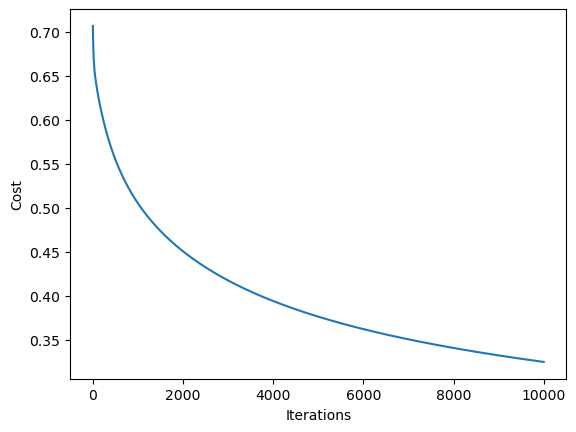

In [50]:
plt.plot(range(len(J_history)), J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


In [54]:
y_pred = []

for i in range(len(x_test)):
  z = np.dot(x_test.iloc[i], w) + b
  y_pred.append(sigmoid(z))

y_pred = np.array(y_pred)

In [80]:
y_pred[0:10]

array([0.05551219, 0.92976676, 0.5801235 , 0.56557168, 0.86059836,
       0.03556367, 0.37511326, 0.1684723 , 0.02027387, 0.92121612])

In [88]:
print(w[0:10])
print(b)

[ 0.30910211 -0.2439351   0.28000605 -0.16504272 -0.47526488  0.25783742
 -0.00062456  0.01974174 -0.14463338 -0.12441705]
-0.1012479176239472


In [58]:
#assigning 0 or 1 based on a chosen threshold

probability_threshold = 0.5

y_pred_binary = []

for i in range(len(y_pred)):
  if y_pred[i] >= probability_threshold:
    y_pred_binary.append(1)
  else:
    y_pred_binary.append(0)

y_pred_binary = np.array(y_pred_binary)

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy * 100}%")

Accuracy: 89.35%


In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score

best_threshold = 0.4
best_f1 = 0

for threshold in np.arange(0.1, 1.0, 0.1):
    y_pred_binary = (y_pred >= threshold).astype(int)

    f1 = f1_score(y_test, y_pred_binary)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best threshold: {best_threshold} with F1-score: {best_f1}")


Best threshold: 0.5 with F1-score: 0.895639392454679


In [64]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)
y_pred_inbuilt = model.predict(x_test)

In [65]:
accuracy_inbuilt = accuracy_score(y_test, y_pred_inbuilt)
print(f"Accuracy: {accuracy_inbuilt * 100}%")

Accuracy: 93.85%


In [68]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_binary)

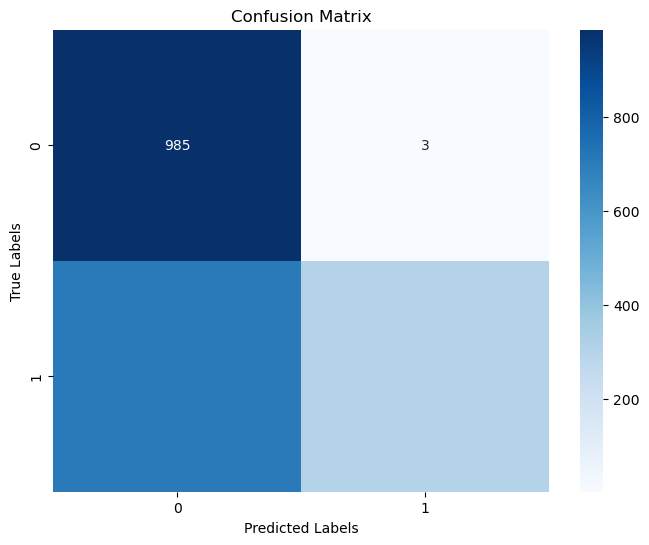

In [70]:
'''this graph provides a visual summary of how well the classification model is performing
by showing how many predictions were correct and how many were incorrect for each class'''

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [94]:
def predict(x, w, b, threshold=0.5):
    z = np.dot(x, w) + b
    prob = sigmoid(z)
    return int(prob >= threshold), prob

x_custom = np.array([
    2, 1, 2, 45, 1, 1, 0, 0, 1, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 15,
    20, 10, 0, 1, 0, 20.0, 1, 1, 0, 0, 0, 0.0, 1, 0, 0, 0, 0, 0, 0,
    2, 45, 20.0, 1, 1.0, 0.0, 0,1 # Add 2 more features at the end or correct positions
])

label, probability = predict(x_custom, w, b)
print(f"Predicted Label: {label} (Phishing if 1, Legit if 0)")
print(f"Probability: {probability:.4f}")

Predicted Label: 0 (Phishing if 1, Legit if 0)
Probability: 0.4605


In [101]:
import pickle

with open("model_parameters.pkl", "wb") as file:
    pickle.dump((w,b), file)

print("Model saved!")

Model saved!
